# Цели и задачи проекта

Глобально в проекте две задачи: сделать выводы из проведенного A/B теста и приоритизировать гипотезы для новых тестов методами RICE/ICE. 

# Навигация по тетрадке

## Блок 1

#### В блоке 1 мы разберем основные гипотезы методами RICE/ICE и выберем самую важную гипотезу. 

## Блок 2

#### Мы сравним группы  А и В, проверим есть ли статистически важные различия в основных показателях (средний чек, конверсия). Сравнения проведем на сырых данных и на отфильтрованных 

# Импорт необходимых библиотек

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

# Чтение файлов

In [2]:
hypothesis_data = pd.read_csv('hypothesis.csv')
orders_data = pd.read_csv('orders.csv')
visitors_data = pd.read_csv('visitors.csv')

Создадим копии от исходных данных

In [3]:
hypothesis = hypothesis_data.copy()
orders = orders_data.copy()
visitors = visitors_data.copy()

### Первичный визуальный анализ данных

In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Список из 9-ти гипотез с разной оценкой, с даннымив все в порядке: нужные форматы, нет пропусков и дубликатов. 

#### Таблица с заказами 

In [5]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
820,767912658,1667360450,2019-08-27,320,B
148,4238948438,363280180,2019-08-01,300,B
1035,2898835960,3972127743,2019-08-09,8439,A
1053,55417546,3044645888,2019-08-11,460,A
662,1811671147,4266935830,2019-08-29,78990,A
218,918752036,3704174715,2019-08-02,2210,B
559,2888367978,1052142804,2019-08-06,890,A
570,1867784682,2247666522,2019-08-04,31350,B
537,384670583,1247895435,2019-08-04,390,A
549,4243941421,1367935136,2019-08-29,35485,A


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В целом данные хорошие, нет явных пропусков и дубликатов, немного неудобные названия столбцов у  transactionId и visitorId. Приведем к нижнему регистру

In [7]:
orders.rename(columns = {'transactionId':'transaction_id', 
                         'visitorId':'visitor_id'}, inplace = True)

#### Таблица с посетителями

In [8]:
visitors.sample(10)

,date,group,visitors
8,2019-08-09,A,617
51,2019-08-21,B,656
53,2019-08-23,B,546
42,2019-08-12,B,543
27,2019-08-28,A,594
48,2019-08-18,B,737
37,2019-08-07,B,709
26,2019-08-27,A,711
15,2019-08-16,A,361
4,2019-08-05,A,756


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В целом все хорошо, данные без пропусков. Только дата в строчном формате, поправим. 

In [10]:
visitors['date'] = pd.to_datetime(visitors['date'])

Посмотрим на размеры выборок

In [11]:
visitors[visitors['group']=='A']['visitors'].sum()

18736

In [12]:
visitors[visitors['group']=='B']['visitors'].sum()

18916

# Часть 1. Приоритизация гипотез.

In [13]:
def ice (row):
    ice = (row['Impact']*row['Confidence'])/row['Efforts']
    return ice

def rice (row):
    rice = (row['Reach']* row['Impact']*row['Confidence'])/row['Efforts']
    return rice

In [14]:
hypothesis['ice'] = hypothesis.apply(ice, axis = 1)
hypothesis['rice'] = hypothesis.apply(rice, axis = 1)

In [15]:
hypothesis['ice'] = hypothesis['ice'].map('{:.2f}'.format).astype('float64') #окгруление вывода ice

In [16]:
#hypothesis.sort_values(by = 'ice', ascending = False)
hypothesis.sort_values(by = 'rice', ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


In [17]:
hyp = []
hypothesis['Hypothesis'].map(lambda x: hyp.append(x)) #составляет список со всеми акциями
hyp

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

Если смотреть на гипотезы по методу ICE, то лидером с небольшим отрывом получается лидирует акция со скидкой на день рождения, что логично, у гипотезы очень большие оценки уверенности и влияния на пользователей. 
При этом шанс того, что человек зайдет именно в свой день рождения в интернет-магазин - довольно мал, поэтому у этой гипотезы низкий охват. Если сортировать по методу RICE, то она потеряет свое первое место, уступив гипотезе по расширению базы пользователей через email рассылки. 

# Часть 2. Анализ A/B-теста

## График кумулятивной выручки по группам

In [18]:
dates_groups = orders[['date', 'group']].drop_duplicates() #массив уникальных значений дат для каждой группы 

In [19]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date']<=x['date'],
                                                                       orders['group']==x['group'])].agg({'date':'max',
                                                                                                          'group':'max',
                                                                                                           'transaction_id':'nunique',
                                                                                                           'revenue':'sum',
                                                                                                          'visitor_id':'nunique'
                                                                                                          
            
                                                                                                          }), axis = 1).sort_values(by = ['date', 'group'])

In [20]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])].agg({'date' : 'max',
                                                                                                                'group' : 'max', 
                                                                                                                'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [21]:
visitors_aggregated.head(5) #накопительный итог по посетителям

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [22]:
orders_aggregated # информация по группам с количеством уникальных заказов и общей выручкой с накопительным эффектом

,date,group,transaction_id,revenue,visitor_id
55,2019-08-01,A,24,148579,20
66,2019-08-01,B,21,101217,20
175,2019-08-02,A,44,242401,38
173,2019-08-02,B,45,266748,43
291,2019-08-03,A,68,354874,62
...,...,...,...,...,...
496,2019-08-29,B,596,5559398,544
730,2019-08-30,A,545,4022970,493
690,2019-08-30,B,620,5774631,567
958,2019-08-31,A,557,4084803,503


In [23]:
orders_aggregated['date'] = pd.to_datetime(orders_aggregated['date'] )

In [24]:
cumulativeData = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])


In [25]:
cumulativeData #соберем даныне в один фрейм 

,date,group,transaction_id,revenue,visitor_id,visitors
0,2019-08-01,A,24,148579,20,719
1,2019-08-01,B,21,101217,20,713
2,2019-08-02,A,44,242401,38,1338
3,2019-08-02,B,45,266748,43,1294
4,2019-08-03,A,68,354874,62,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,5559398,544,17708
58,2019-08-30,A,545,4022970,493,18037
59,2019-08-30,B,620,5774631,567,18198
60,2019-08-31,A,557,4084803,503,18736


In [26]:
cumulativeData.columns = ['date', 'group', 'orders',  'revenue', 'buyers', 'visitors']

In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']] #выборка группы A

In [28]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]#выборка группы B 

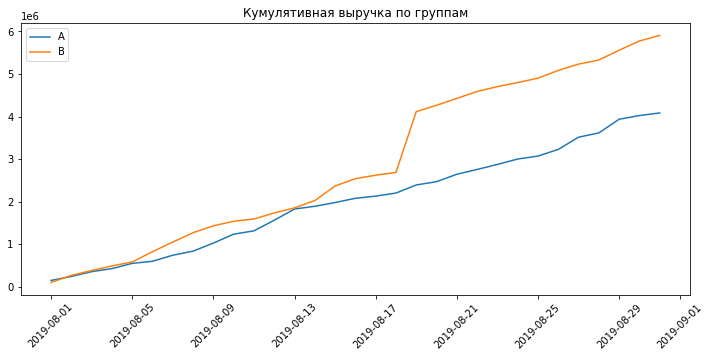

In [29]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=45);

Выручка группы B больше, группы A, н при этом они имеют примерно одинаковые темпы роста, резкий скачок обсулавливается какой-то аномалией, на которую стоит посмотреть повнимательнее. При этом, если убрать выбросы, то выручка все равно больше, но не сильно. 

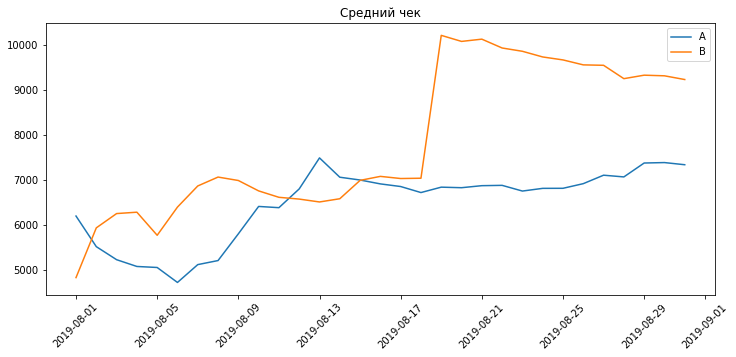

In [30]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Средний чек')
plt.xticks(rotation=45);

Видно что сначала чеки отличались, потом начали стабилизороваться примерно у одного уровня. Но потом резкий выброс - аномалия в данных - сдвинул группу B ощутимо выше. Если посмотреть на график без аномалий, то видно, что средние чеки стабилизировались примерно на одном уровне. 

In [31]:
#соберем данные снова вместе, чтобы взглянуть на график относительных различий по среднему чеку 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date',
                                                   how='left', 
                                                   suffixes=['A', 'B'])

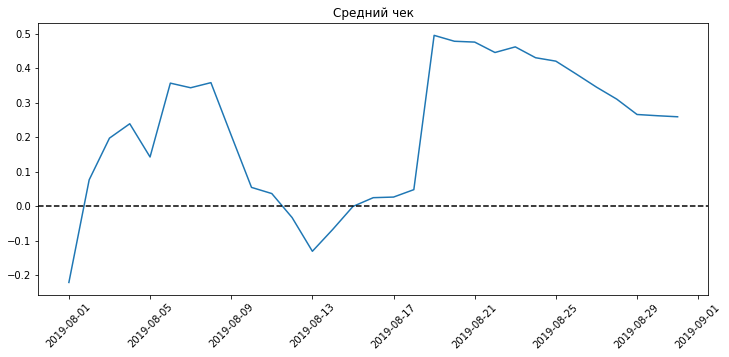

In [32]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Средний чек')
plt.xticks(rotation=45);

## Посмотрим на конверсию 

In [33]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [34]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

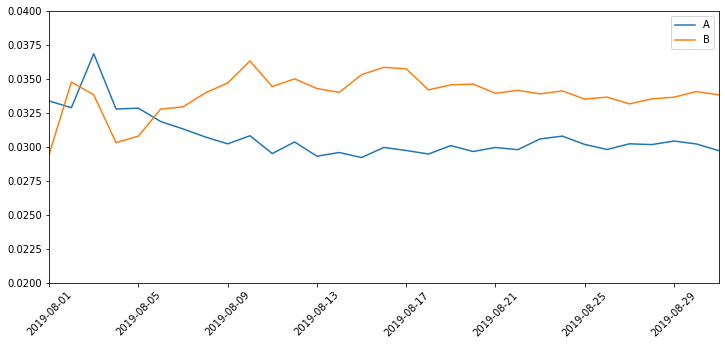

In [35]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])
plt.xticks(rotation=45);

Группа B стабильно показывает конверсию выше, чем группа А, но не сильно. 
Нужно посмотреть на относительные различия конверсии групп

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

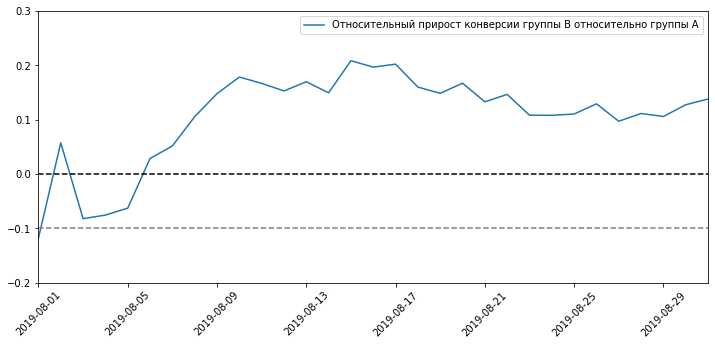

In [37]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])
plt.xticks(rotation=45);

## Точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [38]:
orders_by_users = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).sort_values(by='transaction_id', ascending = False)

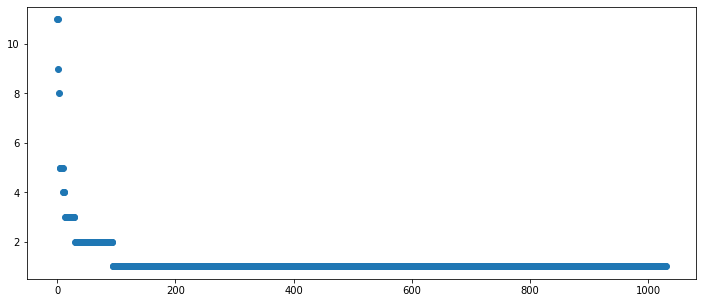

In [39]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['transaction_id']);

Большая часть пользователей заказывает менее двух раз. Абсолютное большинство - делает заказ один раз. 

## 95-й и 99-й перцентили количества заказов на пользователя. 

In [40]:
np.percentile(orders_by_users['transaction_id'], [90, 95, 99])

array([1., 2., 4.])

Аномалии лучше всего считать всех пользователей, у кого заказов больше двух. 

## Точечный график стоимостей заказов.

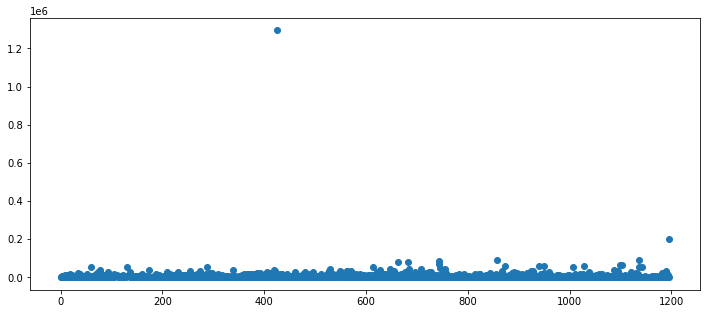

In [41]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue']);

На графике сразу видно, что все заказы с суммой выручки больше 30 000 - выбросы. Дополнительно можно проверить процентилями. 

## 95-й и 99-й перцентили стоимости заказов. 

In [42]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

## Cтатистическая значимость различий в конверсии между группами.

Разделим пользователей с количеством заказов по группам A и B. 

In [43]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' :  pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' :  pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

Чтобы сравнить конверсию групп, нужно будет прибавить к выборкам покупателей посетителей в определенный день, которые не совершили ни одного заказа. Составим таким образом две выборки по группам А и В. 

In [44]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, 
                                                        index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])),
                                                        name='orders')],axis=0)

In [45]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
                                                        index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])),
                                                        name='orders')],axis=0)

In [46]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Для проверки используем критерий Манна-Уитни так как данные распределенны не нормальным образом, есть ощутимые выбросы, которые могут исказить результаты. 

По критерию видно, что уровень значимости - значительно меньше 0.05, поэтому можем опровергнуть нулевую гипотезу.



In [47]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Отвергнуть нулевую гипотезу пока не получится, хоть и при относительном сравнении кажется, что средний чек у группы В выше, чем у группы А. 

## Проведем тесты без выбросов 

In [48]:
orders_by_users = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()
orders_by_users.columns = ['visitor_id','orders']
orders_by_users.sort_values(by='orders',ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


In [49]:
# Фильтр выбросов 

active_users = orders_by_users[orders_by_users['orders']>2] #список пользователей с большиим количеством покупок 
big_orders = orders[orders['revenue']>28000]['visitor_id'] #список пользователей с аномльно дорогими покупками
active_users.reset_index(inplace = True)
abnormal_users = pd.concat([active_users['visitor_id'], big_orders], axis =0) #90 пользователей с аномалиями 
abnormal_users = abnormal_users.drop_duplicates()
orders = orders[~orders['visitor_id'].isin(abnormal_users)]

In [50]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsersB.columns = ['user_id', 'orders']

In [51]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, 
                                                        index=np.arange(visitors.query('group == "A"')['visitors'].sum() - len(ordersByUsersA['orders'])),
                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
                                                        index=np.arange(visitors.query('group == "B"')['visitors'].sum() - len(ordersByUsersB['orders'])),
                                                        name='orders')],axis=0)

In [52]:
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.006
0.176


#### Да. не доглядел букву, спасибо!

После очистки выбросов ситуация качественно не изменилась, все еще  можем опровергнуть нулевую гипотезу о равенстве конверсий.

In [53]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.376
-0.022


А здесь только подтвердилась, если убрать выбросы, то при относительном сравнении групп группа B даже немного уступает группе А по среднему чеку. 